In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 1. Cargar y explorar datos
data = pd.read_csv('Mall_Customers.csv')
print("Vista inicial del dataset:")
display(data.head(10))  # Mostrar las primeras 10 filas

print("\nInformación general del dataset:")
data.info()

print("\nEstadísticas descriptivas del dataset:")
display(data.describe())

Vista inicial del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas descriptivas del dataset:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


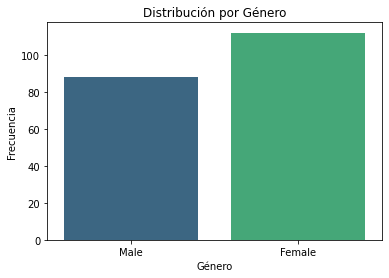

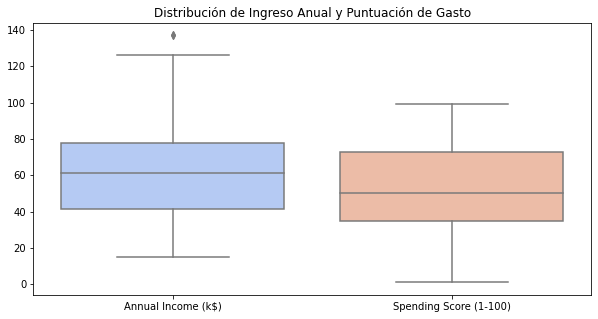

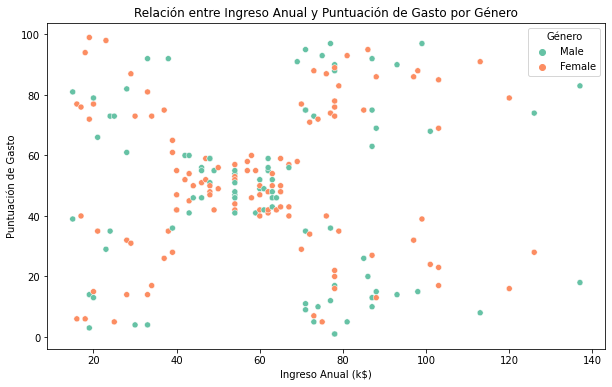

In [3]:
# 2. Análisis exploratorio de datos
# Distribución por género
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de las variables numéricas
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Annual Income (k$)', 'Spending Score (1-100)']], palette="coolwarm")
plt.title("Distribución de Ingreso Anual y Puntuación de Gasto")
plt.show()

# Relación entre Ingreso Anual y Puntuación de Gasto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data, palette='Set2')
plt.title("Relación entre Ingreso Anual y Puntuación de Gasto por Género")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto")
plt.legend(title="Género")
plt.show()

In [4]:
# 3. Manejo de datos atípicos
nivel_minimo = 0
nivel_maximo = 137  # Basado en el rango observado

print("\nIdentificación de datos atípicos:")
atipicos = ((data['Annual Income (k$)'] < nivel_minimo) | (data['Annual Income (k$)'] > nivel_maximo)).sum()
print(f"Total de datos atípicos: {atipicos}")

# Filtrar datos atípicos
data = data[(data['Annual Income (k$)'] >= nivel_minimo) & (data['Annual Income (k$)'] <= nivel_maximo)]
print("\nDataset después de eliminar datos atípicos:")
display(data.describe())


Identificación de datos atípicos:
Total de datos atípicos: 0

Dataset después de eliminar datos atípicos:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# 4. Preprocesamiento de datos
# Transformar variable categórica 'Gender' en numérica
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Seleccionar características relevantes
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

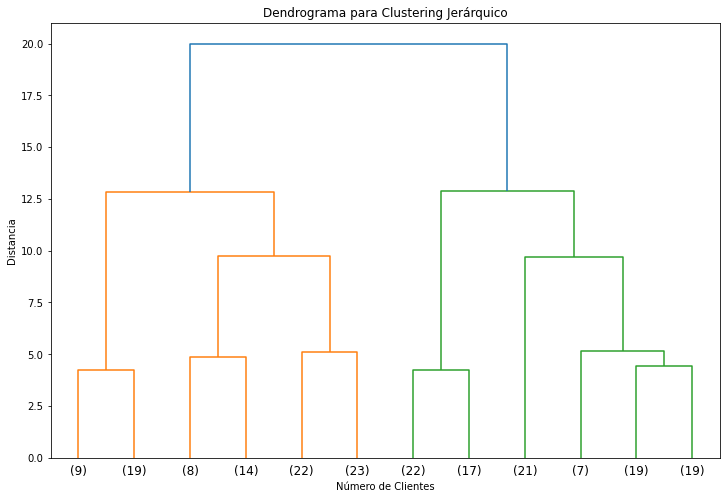

In [6]:
# 5. Visualización del dendrograma
plt.figure(figsize=(12, 8))
linked = linkage(scaled_data, method='ward')
dendrogram(linked, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title("Dendrograma para Clustering Jerárquico")
plt.xlabel("Número de Clientes")
plt.ylabel("Distancia")
plt.show()

In [7]:
# 6. Entrenamiento del modelo de Clustering Jerárquico
num_clusters = 3  # Seleccionado con base en el dendrograma
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
labels = model.fit_predict(scaled_data)

# Agregar los clusters al dataset
data['Cluster'] = labels

In [8]:
# 7. Evaluación del modelo
sil_score = silhouette_score(scaled_data, labels)
ch_score = calinski_harabasz_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)

print("\nEvaluación del modelo de Clustering Jerárquico:")
print(f"Coeficiente de Silhouette: {sil_score:.3f}")
print(f"Índice de Calinski-Harabasz: {ch_score:.3f}")
print(f"Índice de Davies-Bouldin: {db_score:.3f}")


Evaluación del modelo de Clustering Jerárquico:
Coeficiente de Silhouette: 0.321
Índice de Calinski-Harabasz: 88.102
Índice de Davies-Bouldin: 1.128


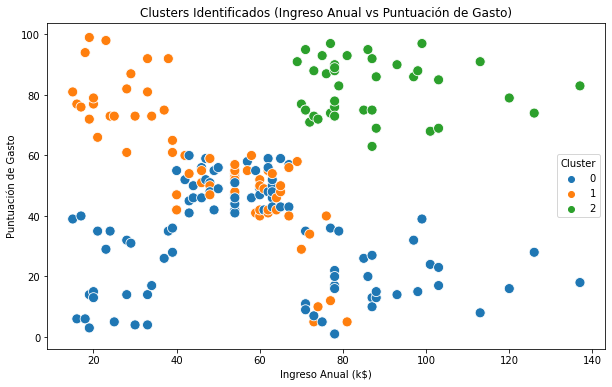

<Figure size 720x504 with 0 Axes>

In [9]:
# 8. Visualización de resultados
# Gráfico de dispersión de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='tab10', s=100)
plt.title("Clusters Identificados (Ingreso Anual vs Puntuación de Gasto)")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto")
plt.legend(title="Cluster")
plt.show()

# Gráfico de silueta
silhouette_vals = silhouette_samples(scaled_data, labels)
plt.figure(figsize=(10, 7))
y_lower = 10